# Data preparation

The data exported from Adidas running is separated in several files and each file includes a uuid and the date of the sport activity in the file name, the same information is included in the file in json format. 

to facilitate the processing I will keep only the uuid as file name to facilitate the liason with the other data (gps and elevation)

In [ ]:
!pip install pandas numpy matplotlib seaborn calmap

In [10]:
import fnmatch
import shutil
import re
import os

def formatDatasetFilename(source: str, destination: str, extension: str = 'json') -> list :
    formatedFilenames = [];
    shutil.rmtree(destination, ignore_errors=True)
    os.mkdir(destination)

    for file in os.listdir(source):
        if fnmatch.fnmatch(file, f'*.{extension}'):

            # removing datetime from original filename
            filename = os.path.join(destination, re.sub("^(.*?)UTC_", "", file))
            shutil.copy(os.path.join(source, file), filename)
            formatedFilenames.append(filename)
    
    return formatedFilenames;

sessions = formatDatasetFilename('./dataset/Sport-sessions', './data/sessions');
gps = formatDatasetFilename('./dataset/Sport-sessions/GPS-data', './data/gps', extension='gpx');
elevations = formatDatasetFilename('./dataset/Sport-sessions/Elevation-data', './data/elevations')

to facilitate the processing I will create a single array containing all the data I have previously formatted

In [11]:
import json
import datetime as dt

sessions_data = []
for session in sessions:
    with open(session, 'r') as f:
        sessions_data.append(json.load(f))

# removing non running sport session
sessions_data = list(filter(lambda session: session['sport_type_id'] == '1', sessions_data))
    
# converting unix timestamp to datatime object
def timestampToDatetime(session: dict, fields: list) -> None :
    for field in fields:
        timestamp = int(session[field]) / 1000
        timezone = dt.timezone(dt.timedelta(seconds=7200)) #UTC+2
        session[field] = dt.datetime.fromtimestamp(timestamp, tz=timezone)
        
for session in sessions_data:
    session['distance'] = session['distance'] / 1000.0
    session['duration'] = round((session['duration'] / 1000) / 60, 2)
    timestampToDatetime(session,['start_time', 'end_time', 'created_at', 'updated_at'])

In [12]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime

sessions_df = pd.DataFrame(sessions_data)

# Creating new features from the data
sessions_df['year'] = sessions_df.start_time.dt.year
sessions_df['month'] = sessions_df.start_time.dt.month
sessions_df['weekday'] = sessions_df.start_time.dt.day_name()
sessions_df['created_at'] = sessions_df.start_time.dt.date
sessions_df['weekday_number'] = sessions_df.start_time.dt.weekday

# Data Visualization

After having prepared my data I can now visualize them according to the different questions I have about my performance

In [13]:
import matplotlib.pyplot as plt
colors = {
    "black": "#000",
    "white": "#fff",
    "gray": {
        50: "#f9fafb",
        100: "#f3f4f6",
        200: "#e5e7eb",
        300: "#d1d5db",
        400: "#9ca3af",
        500: "#6b7280",
        600: "#4b5563",
        700: "#374151",
        800: "#1f2937",
        900: "#111827"
    },
    "red": {
        50: "#fef2f2",
        100: "#fee2e2",
        200: "#fecaca",
        300: "#fca5a5",
        400: "#f87171",
        500: "#ef4444",
        600: "#dc2626",
        700: "#b91c1c",
        800: "#991b1b",
        900: "#7f1d1d"
    },
    "orange": {
        50: "#fff7ed",
        100: "#ffedd5",
        200: "#fed7aa",
        300: "#fdba74",
        400: "#fb923c",
        500: "#f97316",
        600: "#ea580c",
        700: "#c2410c",
        800: "#9a3412",
        900: "#7c2d12"
    },
    "yellow": {
        50: "#fefce8",
        100: "#fef9c3",
        200: "#fef08a",
        300: "#fde047",
        400: "#facc15",
        500: "#eab308",
        600: "#ca8a04",
        700: "#a16207",
        800: "#854d0e",
        900: "#713f12"
    },
    "green": {
        50: "#f0fdf4",
        100: "#dcfce7",
        200: "#bbf7d0",
        300: "#86efac",
        400: "#4ade80",
        500: "#22c55e",
        600: "#16a34a",
        700: "#15803d",
        800: "#166534",
        900: "#14532d"
    },
    "cyan": {
        50: "#ecfeff",
        100: "#cffafe",
        200: "#a5f3fc",
        300: "#67e8f9",
        400: "#22d3ee",
        500: "#06b6d4",
        600: "#0891b2",
        700: "#0e7490",
        800: "#155e75",
        900: "#164e63"
    },
    "blue": {
        50: "#eff6ff",
        100: "#dbeafe",
        200: "#bfdbfe",
        300: "#93c5fd",
        400: "#60a5fa",
        500: "#3b82f6",
        600: "#2563eb",
        700: "#1d4ed8",
        800: "#1e40af",
        900: "#1e3a8a"
    },
    "indigo": {
        50: "#eef2ff",
        100: "#e0e7ff",
        200: "#c7d2fe",
        300: "#a5b4fc",
        400: "#818cf8",
        500: "#6366f1",
        600: "#4f46e5",
        700: "#4338ca",
        800: "#3730a3",
        900: "#312e81"
    },
    "pink": {
        50: "#fdf2f8",
        100: "#fce7f3",
        200: "#fbcfe8",
        300: "#f9a8d4",
        400: "#f472b6",
        500: "#ec4899",
        600: "#db2777",
        700: "#be185d",
        800: "#9d174d",
        900: "#831843"
    }
}


## Sport Session Frequency 

It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).

It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).

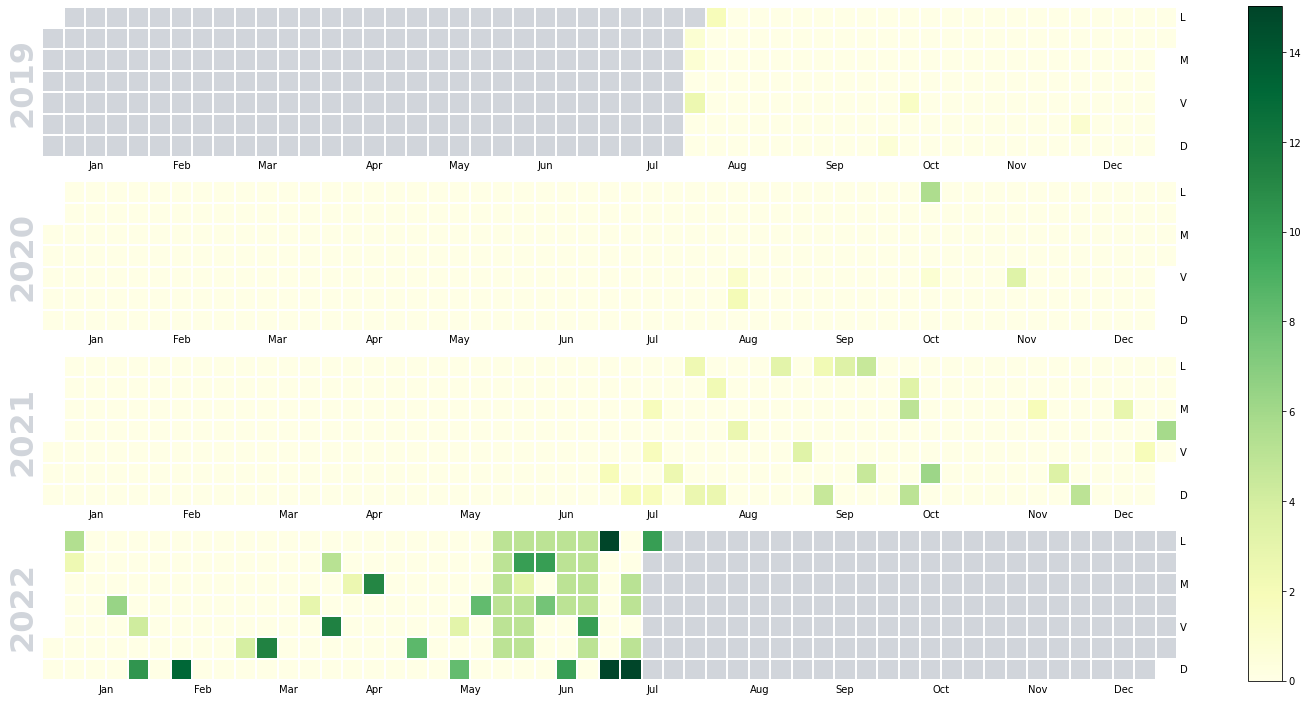

In [14]:
import calmap

sessions_calmap = sessions_df[['created_at', 'distance']].sort_values(by='created_at')
sessions_calmap = sessions_calmap.reset_index(drop=True)
sessions_calmap = pd.Series(
    sessions_calmap['distance'].tolist(),
    pd.DatetimeIndex(sessions_calmap['created_at'].tolist())
);

plt.rcParams["figure.figsize"] = (20, 10)
fig,ax = calmap.calendarplot(
    sessions_calmap,
    monthticks=3,
    cmap='YlGn', 
    fillcolor= colors['gray'][300],
    daylabels='LMMJVSD',
    linewidth=2,
    dayticks=[0, 2, 4, 6],
    fig_kws=dict(figsize=(20, 10))
);

fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist());

## What day of the week did I run the most kilometres?

It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).


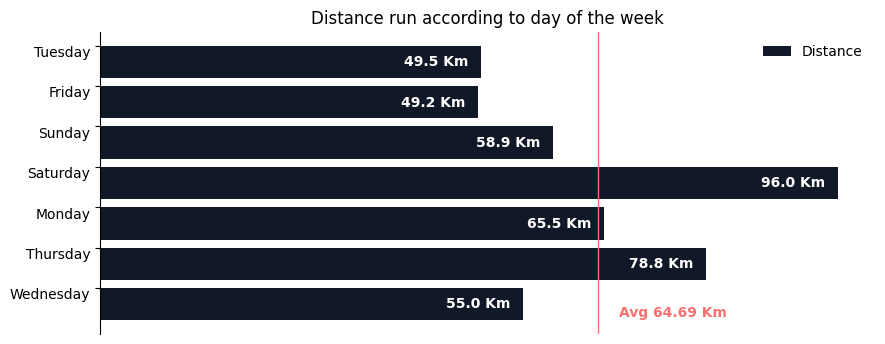

In [15]:
def repartitionPlot(x: list, y: list, title: str, label: str) -> None:
    fig, ax = plt.subplots(figsize=(10, 4), dpi=100)
    bar_width = 0.80
    ind = np.arange(len(y))
    
    average = np.average(y.tolist());
    
    ax.barh(ind, y, bar_width)
    ax.set_yticks(ind + bar_width / 2)
    ax.set_yticklabels(x, minor=False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.get_xaxis().set_ticks([])

    plt.title(title)
    plt.rcParams['axes.titlepad'] = 30
    ax.axvline(average, color=colors['red'][400], linewidth=1)
    ax.barh(x, y, color=colors['gray'][900], label=label)
    ax.legend(frameon=False)

    for label in ax.get_yticklabels():
        label.set_verticalalignment('top')

    for i, v in enumerate(y):
        ax.text(v - 10, i - .1, str(round(v, 1)) + " Km", color='white', fontweight='bold')
        
    
    for data, xoff in zip([y.tolist()], [15, -15]):
        x0 = average
        align = 'left' if xoff > 0 else 'right'

        ax.annotate(
            'Avg {:0.2f} Km'.format(x0), 
            xy=(x0, 0), 
            xytext=(xoff, 15),
            xycoords=('data', 'axes fraction'), 
            textcoords='offset points',
            fontweight='bold',
           horizontalalignment=align, 
            verticalalignment='center',
            color=colors['red'][400],
        )
        
    plt.show();

repartitionPlot(
    x=sessions_df['weekday'].unique(), 
    y=sessions_df.groupby(sessions_df['weekday'])[['distance']].sum()['distance'], 
    title="Distance run according to day of the week", 
    label="Distance"
)

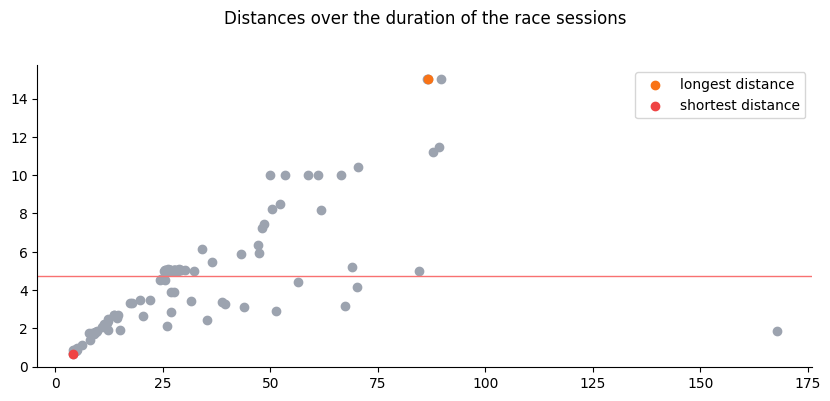

In [16]:
distances_df = sessions_df[['duration', 'distance']].sort_values(by="distance")

minimum = distances_df['distance'].min()
maximum = distances_df['distance'].max()
average = distances_df['distance'].mean()
  
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)
plt.title("Distances over the duration of the race sessions")
plt.rcParams['axes.titlepad'] = 30
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.axhline(average, color=colors['red'][400], linewidth=1)
ax.scatter(distances_df['duration'], distances_df['distance'], color=colors['gray'][400])
ax.scatter(
    distances_df['duration'][distances_df['distance'] == maximum], 
    maximum, 
    color=colors['orange'][500],
    label="longest distance"
)
ax.scatter(
    distances_df['duration'][distances_df['distance'] == minimum], 
    minimum, 
    color=colors['red'][500],
    label="shortest distance"
)
ax.legend();